# DS Automation Assignment

Using our prepared churn data from week 2:
- use pycaret to find an ML algorithm that performs best on the data
    - Choose a metric you think is best to use for finding the best model; by default, it is accuracy but it could be AUC, precision, recall, etc. The week 3 FTE has some information on these different metrics.
- save the model to disk
- create a Python script/file/module with a function that takes a pandas dataframe as an input and returns the probability of churn for each row in the dataframe
    - your Python file/function should print out the predictions for new data (new_churn_data.csv)
    - the true values for the new data are [1, 0, 0, 1, 0] if you're interested
- test your Python module and function with the new data, new_churn_data.csv
- write a short summary of the process and results at the end of this notebook
- upload this Jupyter Notebook and Python file to a Github repository, and turn in a link to the repository in the week 5 assignment dropbox

*Optional* challenges:
- return the probability of churn for each new prediction, and the percentile where that prediction is in the distribution of probability predictions from the training dataset (e.g. a high probability of churn like 0.78 might be at the 90th percentile)
- use other autoML packages, such as TPOT, H2O, MLBox, etc, and compare performance and features with pycaret
- create a class in your Python module to hold the functions that you created
- accept user input to specify a file using a tool such as Python's `input()` function, the `click` package for command-line arguments, or a GUI
- Use the unmodified churn data (new_unmodified_churn_data.csv) in your Python script. This will require adding the same preprocessing steps from week 2 since this data is like the original unmodified dataset from week 1.

# Load data:

we are going to use **pycaret** module for Data Science Automation. Pycaret only supports upto python 3.10 version, but current version is 3.11. So, to avoid difficulties while running, so we have create a new environment with python 3.10.

We can confirm python version by "python --version" in command prompt.

In [44]:
!python --version

Python 3.12.4


In [45]:
!pip install pycaret

**Installing all the required libraries using import command.**

Machine learning workflows can be automated with PyCaret, an open-source, low-code Python machine learning framework.

PyCaret's Classification Module is a supervised machine learning module that is used for classifying elements into groups.

In [47]:
import pandas as pd
from pycaret.classification import ClassificationExperiment 



We load the data using **pandas** module of python. Here, the data given is in csv file. so, we used read_csv function to load the data into the notebook.Pandas is python library which consists of functions and attributes used for data manipulation, data handling, numeric analysis and also data cleaning.

The loaded data can be viewed by calling variable given to loaded dataframe.

we are using the prepared churn data from the week-2.

In [49]:
df = pd.read_csv("transformed_churn_data.csv")
df

,CustomerID,Tenure,PhoneService_Numeric,Contract_Numeric,PaymentMethod_Numeric,MonthlyCharges,TotalCharges,Churn_Numeric,MonthlyChargesPerTenure,LogTotalCharges
0,7590-VHVEG,1,0,0,0,29.85,29.85,0,29.850000,3.396185
1,5575-GNVDE,34,1,1,1,56.95,1889.50,0,1.675000,7.544068
2,3668-QPYBK,2,1,0,1,53.85,108.15,1,26.925000,4.683519
3,7795-CFOCW,45,0,1,2,42.30,1840.75,0,0.940000,7.517928
4,9237-HQITU,2,1,0,0,70.70,151.65,1,35.350000,5.021575
...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,24,1,1,1,84.80,1990.50,0,3.533333,7.596141
7028,2234-XADUH,72,1,1,3,103.20,7362.90,0,1.433333,8.904209
7029,4801-JZAZL,11,0,0,0,29.60,346.45,0,2.690909,5.847739
7030,8361-LTMKD,4,1,0,1,74.40,306.60,1,18.600000,5.725544


In [50]:
df.sample(10)

,CustomerID,Tenure,PhoneService_Numeric,Contract_Numeric,PaymentMethod_Numeric,MonthlyCharges,TotalCharges,Churn_Numeric,MonthlyChargesPerTenure,LogTotalCharges
1015,3748-FVMZZ,4,0,0,0,40.05,162.45,0,10.012500,5.090370
4213,4644-OBGFZ,55,1,1,1,19.50,1026.35,0,0.354545,6.933764
4249,8207-VVMYB,70,1,2,2,26.00,2006.95,0,0.371429,7.604371
3604,2612-RANWT,12,1,0,2,100.15,1164.30,1,8.345833,7.059875
759,1894-IGFSG,22,1,0,0,89.25,1907.85,1,4.056818,7.553732
554,5791-KAJFD,56,1,1,2,68.75,3808.00,0,1.227679,8.244859
2529,8565-HBFNN,69,1,1,3,107.20,7317.10,0,1.553623,8.897969
5751,4583-PARNH,16,1,0,0,91.55,1540.05,0,5.721875,7.339570
4149,2465-BLLEU,1,1,0,1,19.75,19.75,0,19.750000,2.983153
6980,3585-ISXZP,8,1,0,2,95.65,778.10,1,11.956250,6.656855


Using **df.info()**, we can verify that the loaded data is still in the correct format and has no missing values.

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               7032 non-null   object 
 1   Tenure                   7032 non-null   int64  
 2   PhoneService_Numeric     7032 non-null   int64  
 3   Contract_Numeric         7032 non-null   int64  
 4   PaymentMethod_Numeric    7032 non-null   int64  
 5   MonthlyCharges           7032 non-null   float64
 6   TotalCharges             7032 non-null   float64
 7   Churn_Numeric            7032 non-null   int64  
 8   MonthlyChargesPerTenure  7032 non-null   float64
 9   LogTotalCharges          7032 non-null   float64
dtypes: float64(4), int64(5), object(1)
memory usage: 549.5+ KB


# Creating automl using pycaret:

Using cross-validation, the ClassificationExperiment function trains and assesses the effectiveness of every estimator in the model library. This function provides a score grid with average cross-validated scores as its output. The get_metrics function can be used to get metrics that are examined during CV.

we create ds automation using ClassificationExperiment()

In [54]:
automl = ClassificationExperiment()

setup function initializes the experiment in PyCaret and creates the transformation pipeline based on all the parameters passed in the function. It takes two required parameters: data and target. 

Here, data is our dataframe(df) and target is 'Churn'

In [56]:
automl.setup(df, target = 'Churn_Numeric')

,Description,Value
0,Session id,1281
1,Target,Churn_Numeric
2,Target type,Binary
3,Original data shape,"(7032, 10)"
4,Transformed data shape,"(7032, 10)"
5,Transformed train set shape,"(4922, 10)"
6,Transformed test set shape,"(2110, 10)"
7,Numeric features,8
8,Categorical features,1
9,Preprocess,True


In [57]:
automl

compare_models() allows to compare all the models and get the best model based on the evaluation metric given to it. By default, 'accuracy' is the default metric for comparision.

we also assign best model from the ds automation to best_model.

In [59]:
best_model = automl.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.7749,0.8040,0.5238,0.5862,0.5522,0.4028,0.4045,0.0500
knn,K Neighbors Classifier,0.7643,0.7453,0.4450,0.5739,0.5007,0.3498,0.3550,0.0830
lr,Logistic Regression,0.7515,0.8147,0.1674,0.6246,0.2609,0.1689,0.2225,0.2520
dt,Decision Tree Classifier,0.7343,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0500
ridge,Ridge Classifier,0.7343,0.8393,0.0000,0.0000,0.0000,0.0000,0.0000,0.0510
rf,Random Forest Classifier,0.7343,0.6254,0.0000,0.0000,0.0000,0.0000,0.0000,0.2640
qda,Quadratic Discriminant Analysis,0.7343,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0520
ada,Ada Boost Classifier,0.7343,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0850
gbc,Gradient Boosting Classifier,0.7343,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2840
lda,Linear Discriminant Analysis,0.7343,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0610


In [60]:
best_model

GaussianNB(priors=None, var_smoothing=1e-09)

Evaluate_model function  gives all the possible evaluation metrics for the model.

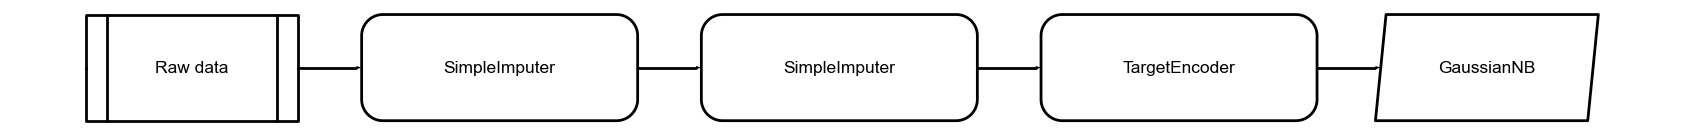

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [63]:
automl.evaluate_model(best_model)

plot_model function provides the different evalution plots for the model. By default, it produces **ROC** Curve . 

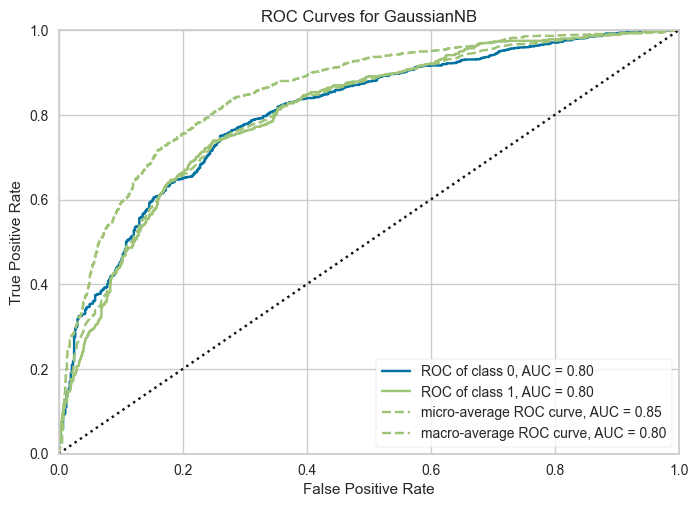

In [65]:
automl.plot_model(best_model)

The above plot shows the ROC curve of best_modl(gbc). In the plot, our model Area under curve value is 0.84, it shows model perfromance is considered as good.

# Saving the model:

Save_model function in pycaret saves the transformation pipeline and trained model object into the current working directory as a pickle file for later use.

In [68]:
automl.save_model(best_model, 'pycaret_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Tenure', 'PhoneService_Numeric',
                                              'Contract_Numeric',
                                              'PaymentMethod_Numeric',
                                              'MonthlyCharges', 'TotalCharges',
                                              'MonthlyChargesPerTenure',
                                              'LogTotalCharges'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features...
                                                               strategy='most_frequent'))),
                 (

Here, we saved our model as 'pycaret_model'.

# Loading the model:

we can load the saved model by using load_model function of pycaret.The load model function loads a previously saved pipeline.

In [71]:
new_pycaret = ClassificationExperiment()
loaded_model = new_pycaret.load_model('pycaret_model')

Transformation Pipeline and Model Successfully Loaded


In [73]:
new_pycaret.predict_model(loaded_model, df.iloc[-9:-1])

,CustomerID,Tenure,PhoneService_Numeric,Contract_Numeric,PaymentMethod_Numeric,MonthlyCharges,TotalCharges,MonthlyChargesPerTenure,LogTotalCharges,Churn_Numeric,prediction_label,prediction_score
7023,0639-TSIQW,67,1,0,3,102.949997,6886.250000,1.536567,8.837282,1,0,0.9930
7024,8456-QDAVC,19,1,0,2,78.699997,1495.099976,4.142105,7.309948,0,0,0.8880
7025,7750-EYXWZ,12,0,1,0,60.650002,743.299988,5.054167,6.611100,0,0,0.9749
7026,2569-WGERO,72,1,2,2,21.150000,1419.400024,0.293750,7.257989,0,0,1.0000
7027,6840-RESVB,24,1,1,1,84.800003,1990.500000,3.533333,7.596141,0,0,0.9885
7028,2234-XADUH,72,1,1,3,103.199997,7362.899902,1.433333,8.904209,0,0,1.0000
7029,4801-JZAZL,11,0,0,0,29.600000,346.450012,2.690909,5.847739,0,0,0.8480
7030,8361-LTMKD,4,1,0,1,74.400002,306.600006,18.600000,5.725544,1,1,0.9844


we can observe , predict_model created two new columns i.e.,'prediction_label' and 'prediction_score'. prediction_label is the predicted output for the given data whereas the prediction_score is the probability of that predcited_label.

# Displaying python module and running with prepared_churn_data:

we can observe the created python module by using IPython.display in python.

We can test our python module running the file with the Jupyter "magic" command %run.

our python module will ask for a **filename** as input to predict the churn , finding probabilities and true_labels for the data. 

In [88]:
%run predict_churn.py

Transformation Pipeline and Model Successfully Loaded
predictions:
  Churn_prediction
0            Churn
1         No churn
2         No churn
3            Churn
4         No churn


<Figure size 800x550 with 0 Axes>

# Summary

Write a short summary of the process and results here.

The main aim of the project is create DS Automation and upload them in GitHUb repository. we  used **pycaret** module for Data Science Automation. Pycaret only supports upto python 3.10 version, but our current version is 3.12. So, to avoid difficulties while running, so I have created a new environment with python 3.10. Next, I created a new automation model "automl" using pycaret. I used setup to create a pipeline and differentiate the target from the data. The compare_model of pycaret allows to get the best_model from the automation. I got Gradient Boosting Classifier(gbc) as our best model, by considering "accuracy" as parameter, with a accuracy  of **79.41%**. Then, I evaluated model and plotted the ROC curve for the best_model. Here, we got AUC of 84%. Later, we saved our model as **pycaret_model** and loaded to test for last rows of dataframe.

I  created a python module **(predict_Churn_pycaret)** which has load_data, make_predictions, probabilities and predict_true functions. Our module also able to load the pycaret_model using 'load_model' and predict Churn using 'predict_model' of pycaret. I tested  our python module running the transformed churn data with the Jupyter "magic" command %run.It gives the output of whether customer is likely to churn or not, and thier churn probabilities and true labels. In order to utilize our developed model to determine the predictions for the new_churn_data, I must  imported  our predict_Churn_pycartet module as pych before using its functions.our model has predicted true values as [1,0,0,1,0] and actual true values for the model are [1,0,0,1,0] . Here, I can observe that our model predicted almost 5 out of 5 are correct, it is 100% accuracy, which is equal to our model accuracy. so, I can consider that our model as a better model. Finally, we have uploaded our entire code into GitHub **MSDMS600-week-5-Assignment_Madhuri**.
